<a href="https://colab.research.google.com/github/Nato9-7/EDA_FundamentosML_RenatoDiaz/blob/main/InformeML_DesicionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd # Pandas es una biblioteca de análisis y manipulación de datos.
import numpy as np # Numpy es una biblioteca para el cálculo numérico en Python.
import matplotlib.pyplot as plt # Matplotlib es una biblioteca para la creación de gráficos en Python.
from scipy.stats import norm # La distribución normal es una distribución de probabilidad continua que se utiliza ampliamente en estadística.

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle

In [2]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
cs_df = pd.read_csv(name, sep=",", encoding='UTF-8')

Saving DF_CS_ARREGLADO.csv to DF_CS_ARREGLADO.csv


count    666.000000
mean      79.792793
std       22.072178
min        6.000000
25%       66.000000
50%       78.000000
75%       94.000000
max      136.000000
Name: RoundKills, dtype: float64


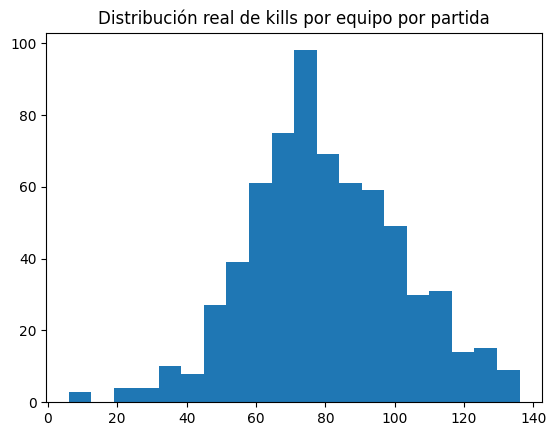

In [3]:
datos = cs_df.groupby(['MatchId', 'Team']).agg({
    'RoundKills': 'sum',
    'TeamStartingEquipmentValue': 'mean',
    'PrimarySniperRifle': 'mean',
    'RLethalGrenadesThrown': 'sum',
    'RNonLethalGrenadesThrown': 'sum',
    "PrimaryHeavy" : "mean",
    "PrimarySMG" : "mean",
    "PrimaryPistol" : "mean"
}).reset_index()
# Verificar distribución
print(datos['RoundKills'].describe())
plt.hist(datos['RoundKills'], bins=20)
plt.title('Distribución real de kills por equipo por partida')
plt.show()

#DESICION TREE

In [4]:
X = datos.drop(['MatchId', 'Team', 'RoundKills'], axis=1)
y = datos['RoundKills']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Modelamiento

In [6]:
round_tree = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
round_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

Para el modelamiento utilizamos un max_depth (max de preguntas antes de una respuesta) de 4 para evitar sobreajustes. Igual un min_samples_split de 10 (10 partidas similares para analisis). Por ultimo un min_samples_leaf de 5 (cada respuesta se basa en 5 partidas reales)

##Observación

COMPARACIÓN DE RENDIMIENTO
-------------------------
Métrica		Entrenamiento	Prueba	Diferencia
R²		0.764		0.710		0.054
MAE		8.28		10.22		-1.94


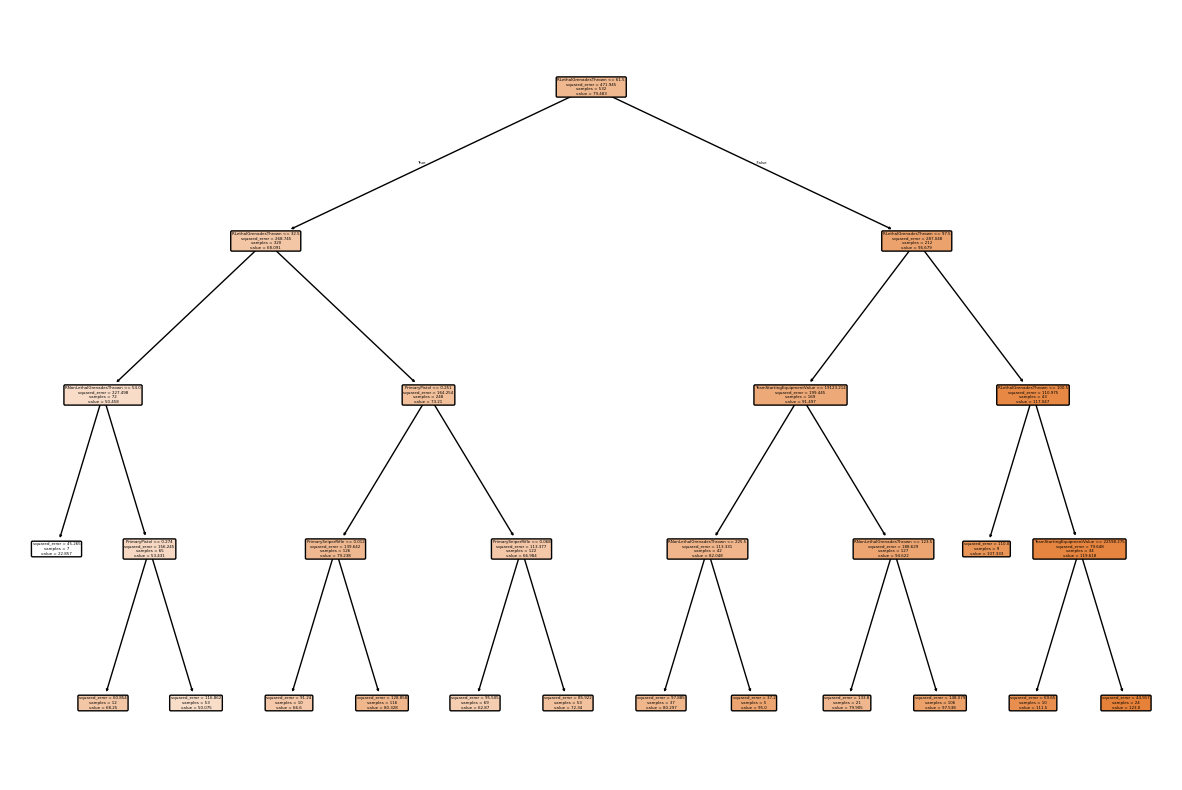

In [9]:
train_pred = round_tree.predict(X_train)
test_pred = round_tree.predict(X_test)

print("COMPARACIÓN DE RENDIMIENTO")
print("-------------------------")
print(f"Métrica\t\tEntrenamiento\tPrueba\tDiferencia")
print(f"R²\t\t{r2_score(y_train, train_pred):.3f}\t\t{r2_score(y_test, test_pred):.3f}\t\t{r2_score(y_train, train_pred) - r2_score(y_test, test_pred):.3f}")
print(f"MAE\t\t{mean_absolute_error(y_train, train_pred):.2f}\t\t{mean_absolute_error(y_test, test_pred):.2f}\t\t{mean_absolute_error(y_train, train_pred) - mean_absolute_error(y_test, test_pred):.2f}")
# Visualizar árbol
plt.figure(figsize=(15, 10))
plot_tree(round_tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

El siguiente modelo nos da un R2 de un 71%. Lo cual, es un poco inferior al modelo anterior, también el margen de error es de +-10 kills.
